# Pre-camp problem set
---


This notebook is designed to help you practice coding in Python before programming camp. It follows the same structure of the Matlab problem set. 

Lets first import some packages that we will use. 

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numba import njit

## Fibonacci Numbers
We want to write a function that exhibits the following properties:
$$
\begin{eqnarray}
f(1) &=& 1 \\\
f(2) &=& 1 \\\
f(n) &=& f(n-1) + f(n-1)
\end{eqnarray}
$$

---
### Q1. A recursive function
**(a)** Write a function *fiborecursion* that computes f(n) recursively. 

The algorithm is: .

    if n<=2:
        fib = 1
    else:
        fib = fiborecursion(n-1) + fiborecursion(n-1)
    return fub


In [2]:
def fiborecursion(n):
    """
    A function to compute the fibonacci sequence recursively
    Inputs:   n   : int  , element of the series that we want to know 
    Outputs:  fib : float, f(n)
    """
    if n <=2:
        fib = 1
    else:
        fib = fiborecursion(n-1) + fiborecursion(n-2)
    return fib

**(b)** Use your function to compute and print the first ten numbers of the sequence. 

*Note:* 
1. Python starts indexing at 0, so to go from f(1) to f(10) we need to tell it to go to index 11. Use ``for i in range(1,11):``


In [3]:
for i in range(1,11):
    print(f'f({i})= ',  fiborecursion(i) )      # to print the index i within the string we need put ``f`` before the string and use ``{i}`` to identify the varaible we want to print and where. 

f(1)=  1
f(2)=  1
f(3)=  2
f(4)=  3
f(5)=  5
f(6)=  8
f(7)=  13
f(8)=  21
f(9)=  34
f(10)=  55


--- 
### Q2. A loop based function
The previous function written very explicitly, and is easy to read. The only issue here is that, to evaluate fiborecursion(n), you need to first figure out fiborecursion(m) for all m<n first, which could be very slow. As a result, an alternative way of writing it is required.

**(a)** Write the same function using a loop. Print the first ten numbers in the sequence. 

The algorithm is 

    if m <=2:
        fib = 1
    else: 
        fib = 1
        fibprev = 1
        
        for i in range (3, m+1):
            temp = fib
            fib = fib + fibprev
            fibprev = temp
    return fib

In [4]:
def fiboloop(m):
    if m <=2:
        fib = 1
    else: 
        fib = 1
        fibprev = 1
        
        for i in range (3, m+1):
            temp = fib
            fib = fib + fibprev
            fibprev = temp
    return fib

In [5]:
for i in range(1,11):
    print(f'f({i})= ',  fiboloop(i) )

f(1)=  1
f(2)=  1
f(3)=  2
f(4)=  3
f(5)=  5
f(6)=  8
f(7)=  13
f(8)=  21
f(9)=  34
f(10)=  55


---
## Q3. Timing and plotting.
Now lets time your functions. 

**(a)**
1. Initialize a vector to store times using ``np.zeros(T)``
2. Write a loop that computes f(n) up to n=30 
3. Store the time taken using `` start[i]= time.time()`` to start and ``end[i] = time.time() - start[i]``
4. Plot the times up to n=30 for each function using ``plt.plot(x,y)``

In [6]:
index = np.arange(30)+1
start = np.zeros((30,2))
end = np.zeros((30,2))
fib = np.zeros((30,2))


for i in range(1,31):
    start[i-1,0] = time.time()
    fib[i-1,0] =  fiborecursion(i)
    end[i-1,0] = time.time() - start[i-1,0]
    
    start[i-1,1] = time.time()
    fib[i-1,1] =  fiboloop(i)
    end[i-1,1] = time.time() - start[i-1,1]

assert fib[25,0] == fib[25,1]

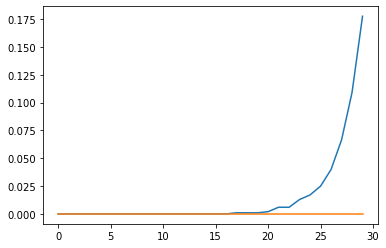

In [7]:
# This will give us a quick and dirty plot
plt.plot(end)

While ``plt.plot()`` can make a plot quickly, it will not be very clear or readable. 

**(b)** Make your plot look good:
1. Pick some nice colors for the lines, and make one of them dashed;
2. Add axis labels, e.g. using ``plt.ylabel()``
3. Add labels to your lines ``plt.plot(x,y, label = "This is a label")``, and show them with a legend ``plt.legend()''
4. Increase the font and line size on everything 
5. Check out more options and ideas at the Matplotlib website, [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and [there](https://matplotlib.org/stable/gallery/index.html).

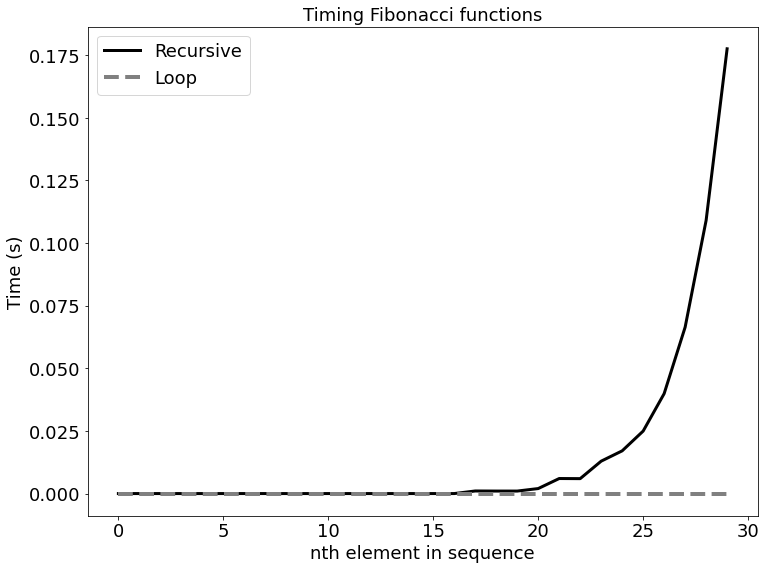

In [8]:

plt.figure(figsize=(12,9))
plt.title('Timing Fibonacci functions', fontsize = 18)
plt.plot(end[:,0], color= 'black', linestyle ='-', linewidth=3, label = "Recursive", )
plt.plot(end[:,1], color= 'gray', linestyle ='--', lw=4,        label = "Loop")
plt.ylabel('Time (s)', fontsize =18)
plt.xlabel('nth element in sequence', fontsize = 18)
plt.xticks( fontsize = 18)
plt.yticks( fontsize = 18)
plt.legend( fontsize = 18)
plt.savefig('figure_name.png') # this will save in the same folders as this notebook

## Q4. Why is one function faster than the other?

(This is your chance to use a Markdown cell to write some text!)


# Bonus: going even faster
Python is an interpreted language. Each time an interpreted program is run, the interpreter must convert source code into machine code before it is run. This can be really helpful because the python interpreter does lots of work that might need to be done by the programmer in other languages (such as keeping track of varaible types).

But, this can make Python pretty slow. Luckily this is where numba can help. By adding the a numba *decorator* to a function, Numba will convert this function to machine code and store it. The first run will have an initial set-up cost, but then every other run will be alot faster. 

**(a)** Adapt your ``fiboloop`` function to add the ``@njit'' decorator. 

    @njit
    def fiboloop_numba(m):
        #Same code as before

In [9]:
@njit
def fiboloop_numba(m):
    if m <=2:
        fib = 1
    else: 
        fib = 1
        fibprev = 1
        
        for i in range (3, m+1):
            temp = fib
            fib = fib + fibprev
            fibprev = temp
    return fib

Your functions will be so fast that the previous timing loop will not detect much of a difference on one iteration. The function ``%timeit`` will run many loops to time your functions. 

**(b)** Time both your loop based functions using ``%timeit``. How big is the numba speedup?

    %timeit fiboloop(1000)
    
*Note:* ns (nanoseconds) and us (microseconds) and ms (milisecond) are 10-9 and 10-6 and 10-3 (0.001) seconds respectively.

In [10]:
%timeit fiboloop(1000)
%timeit fiboloop_numba(1000)

65 µs ± 3.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 6.40 times longer than the fastest. This could mean that an intermediate result is being cached.
914 ns ± 936 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
n_max  = 5000
index = np.arange(n_max)+1


start = time.time()
for i in range(1,(n_max+1)):
    fib =  fiboloop(i)
end_normal = time.time() - start

start = time.time()
for i in range(1,(n_max+1)):
    fib =  fiboloop_numba(i)
end_numba = time.time() - start

numba_speed_up = end_normal/end_numba
print(f'Numba speed up: {numba_speed_up :.0f}x')

Numba speed up: 262x
